In [47]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from mord import LogisticIT
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Problem Statement
The model trained based on this dataset will help dietitians to plan proper diet for thier clients based on their current diagnostic measurements, so that they can avoid the risk of having diabetes in future. This dataset has been taken from kaggle, originally collected by National Institute of Diabetes and Digestive and Kidney Diseases. 

In [24]:
dia = pd.read_csv("diabetes.csv")
dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Correlation among feaatures
Based on the heatmap, we can conclude that there is not high correlation among any of the features, so it is safe to take into consideration all the variables to train the model.

<AxesSubplot:>

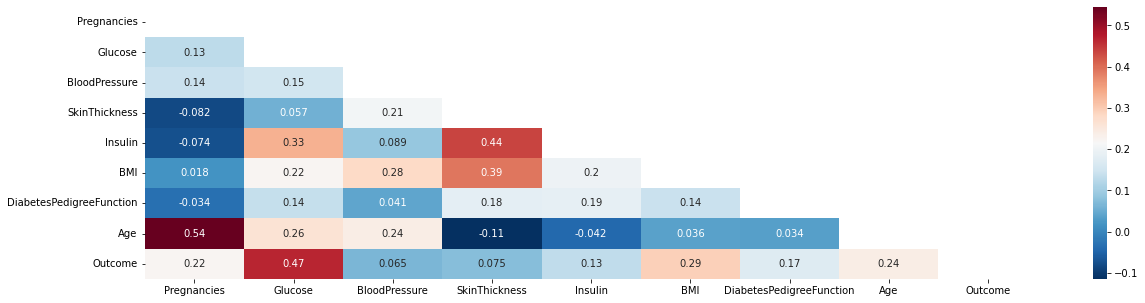

In [28]:
mask = np.zeros_like(dia.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))
sns.heatmap(dia.corr(),cmap='RdBu_r',mask=mask, annot=True)

### Dealing with missing or bad data 
Dataset have no null value, but if we look at the minimum value we can see that glucose, bloodpressure, skinthickness and BMI is having 0. In real life, there is no possibility of this variable being 0 so the optimum solution is to replace it with mean, median or mode. 
To decide which method to use we can check the skewness of the data, based on the skewness score we can conclude that data is not much skewed so mean is the right option to go with except for Insulin which is having high skewness so for that median is a good option.

In [29]:
dia.loc[dia['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [48]:
skew(dia['Glucose'])

0.5321827325344577

In [30]:
dia['Glucose'].mean()

120.89453125

In [31]:
dia['Glucose'] = dia['Glucose'].replace(0, dia['Glucose'].mean())
dia.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [51]:
print(skew(dia['BloodPressure']))
dia['BloodPressure'] = dia['BloodPressure'].replace(0, dia['BloodPressure'].mean())
#dia.min()

0.1727120409853505


In [53]:
print(skew(dia['SkinThickness']),skew(dia['Insulin']),skew(dia['BMI']))
dia['SkinThickness'] = dia['SkinThickness'].replace(0, dia['SkinThickness'].mean())
dia['Insulin'] = dia['Insulin'].replace(0, dia['Insulin'].median())
dia['BMI'] = dia['BMI'].replace(0, dia['BMI'].mean())
dia.min()

1.224272819820414 3.2853921882616057 0.5999285101343649


Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

Text(0.5, 1.0, 'Age')

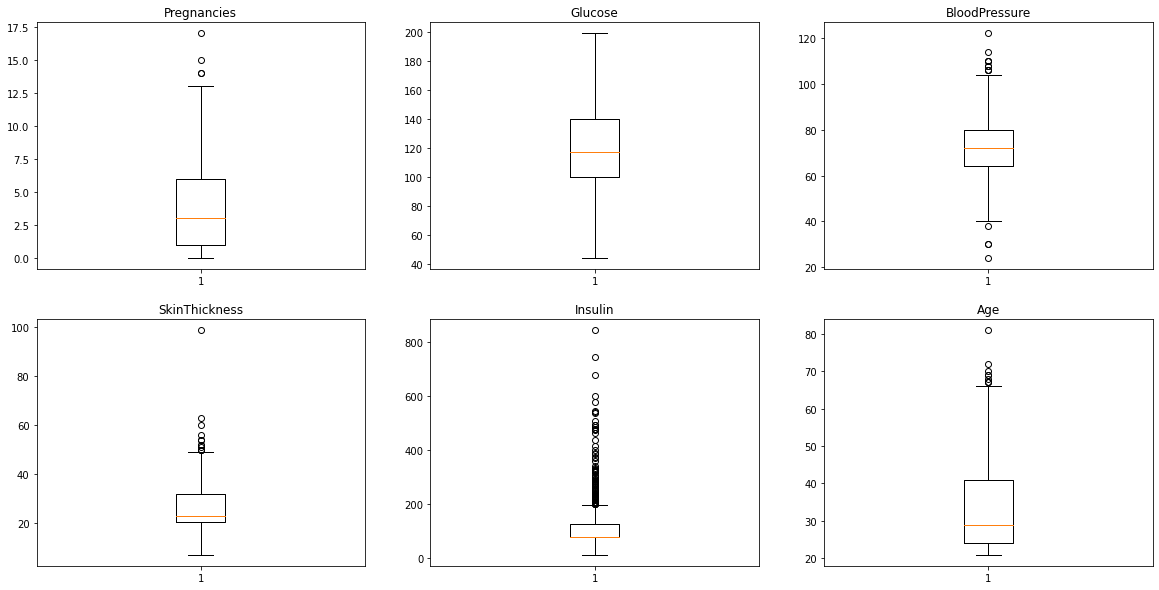

In [54]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0,0].boxplot(dia['Pregnancies'])
axs[0,0].set_title("Pregnancies")
axs[0,1].boxplot(dia['Glucose'])
axs[0,1].set_title("Glucose")
axs[0,2].boxplot(dia['BloodPressure'])
axs[0,2].set_title("BloodPressure")
axs[1,0].boxplot(dia['SkinThickness'])
axs[1,0].set_title("SkinThickness")
axs[1,1].boxplot(dia['Insulin'])
axs[1,1].set_title("Insulin")
axs[1,2].boxplot(dia['Age'])
axs[1,2].set_title("Age")

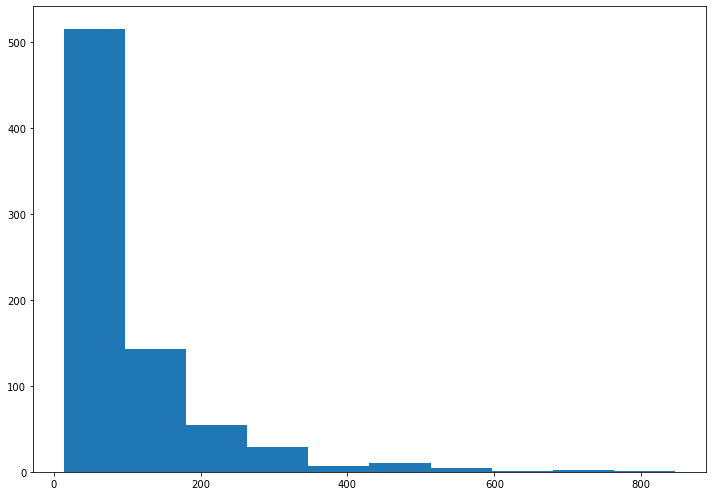

In [56]:
fig, axs = plt.subplots(1, 1,figsize =(10, 7),tight_layout = True)
 
axs.hist(dia['Insulin'], bins = 10)
 
# Show plot
plt.show()

### Logistics Regression 
Split the dataset into train and test, train the logistic regression model using this data set which can be then used as a based to predict the value in future.

In [35]:
y = dia['Outcome']
X = dia.drop(columns=['Outcome'])

# partition data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()

### Akaike information criterion (AIC) (Akaike, 1974) is a fined technique based on in-sample 
### fit to estimate the likelihood of a model to predict/estimate the future values.
print('AIC', AIC_score(test_y, logit_reg.predict(test_X), df = len(train_X.columns) + 1))

intercept  -9.01638704948112
       Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
coeff     0.071302  0.035376      -0.019649      -0.014096  0.00019  0.129028   

       DiabetesPedigreeFunction       Age  
coeff                  0.407176  0.028109  

AIC 454.8474520051017


In [36]:
classificationSummary(train_y, logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.7761)

       Prediction
Actual   0   1
     0 262  39
     1  64  95


### Cross validation using logisticregression 
The accuracy of the model trained using simple logistic regression is not good, to increase the accuracy we can use cross validation logistic regression.
There is no increase in the accuracy level but this is the more reliable model compared to the previous one.
The another intereting observation here is type 1 and type 2 error has decreased compared to the previous model.

In [57]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, 
                                                      random_state=1)

logit_red = LogisticRegressionCV(penalty="l1", solver='liblinear', cv=10)
logit_red.fit(train_X, train_y)
pd.set_option('display.width', 100)
print('regularization', logit_red.C_)
print('intercept ', logit_red.intercept_[0])
print(pd.DataFrame({'coeff': logit_red.coef_[0]}, index=X.columns).transpose())
pd.reset_option('display.width')
print('AIC', AIC_score(valid_y, logit_red.predict(valid_X), df=len(train_X.columns) + 1))

# confusion matrix
classificationSummary(valid_y, logit_red.predict(valid_X))

regularization [2.7825594]
intercept  -8.62625336759052
       Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
coeff     0.070347  0.034539      -0.020967      -0.013893  0.000258  0.125092   

       DiabetesPedigreeFunction       Age  
coeff                  0.337896  0.027329  
AIC 463.0612721064074
Confusion Matrix (Accuracy 0.7532)

       Prediction
Actual   0   1
     0 173  26
     1  50  59


### Naive Bayes
To check if the accuracy of the model increases by changing the algorithm, train using naive bayes.


In [38]:
# run naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(train_X, train_y)

# predict probabilities
predProb_train = delays_nb.predict_proba(train_X)
predProb_test = delays_nb.predict_proba(test_X)

# predict class membership
y_train_pred_nb = delays_nb.predict(train_X)
y_test_pred_nb = delays_nb.predict(test_X)

# accuracy
classificationSummary(train_y, y_train_pred_nb) 
print()
classificationSummary(test_y, y_test_pred_nb)
print()

Confusion Matrix (Accuracy 0.6543)

       Prediction
Actual   0   1
     0 242  59
     1 100  59

Confusion Matrix (Accuracy 0.6006)

       Prediction
Actual   0   1
     0 149  50
     1  73  36



### KNN classification 
Take a record of unseen data which can be then fed to the trained model using knn algorithm to check the accuracy.
The record taken is not related to any of the record in the 

In [39]:
train_data, test_data = train_test_split(dia, test_size=0.40, random_state=26)
    
# dataframe of to predict
predict_data = pd.DataFrame([
    {'Pregnancies':7,'Glucose':102,'BloodPressure':79,'SkinThickness':27,'Insulin':200,'BMI':45.7,'DiabetesPedigreeFunction':0.9,'Age':34},
])

### Normalization of Data
As knn requires data to be normalized on the metric scale for the equal importance of all the features irrespective to the values.

In [40]:
scaler = StandardScaler()
scaler.fit(train_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

# Transform the full dataset
dia_normalized = pd.concat([pd.DataFrame(
    scaler.transform(dia[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]), columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']),
                                      dia[['Outcome']]], axis=1)
train_normalized = dia_normalized.iloc[train_data.index]
test_normalized = dia_normalized.iloc[test_data.index]
predict_normalized = pd.DataFrame(scaler.transform(predict_data), columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [41]:
# Initialize a data frame with two columns: `k` and `accuracy`
train_normalized_x = train_normalized[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
train_normalized_y = train_normalized['Outcome']
test_normalized_x = test_normalized[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
test_normalized_y = test_normalized['Outcome']

In [42]:
# iterate over a range of nearest neighbor values
# train and check with test
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_normalized_x, train_normalized_y)
    results.append({'k': k, 'accuracy': accuracy_score(test_normalized_y, knn.predict(test_normalized_x))})
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.668831
1    2  0.678571
2    3  0.720779
3    4  0.730519
4    5  0.730519
5    6  0.750000
6    7  0.753247
7    8  0.746753
8    9  0.746753
9   10  0.775974
10  11  0.762987
11  12  0.759740
12  13  0.766234
13  14  0.753247


In [44]:
# train with all data
knn = KNeighborsClassifier(n_neighbors=6).fit(train_normalized_x, train_normalized_y)

# predict class membership
y_train_pred_knn = knn.predict(train_normalized_x)
y_test_pred_knn = knn.predict(test_normalized_x)


classificationSummary(train_normalized_y, y_train_pred) 
print()
classificationSummary(test_normalized_y, y_test_pred)
print()



Confusion Matrix (Accuracy 0.5848)

       Prediction
Actual   0   1
     0 227  76
     1 115  42

Confusion Matrix (Accuracy 0.5877)

       Prediction
Actual   0   1
     0 146  51
     1  76  35



In [45]:
distances, indices = knn.kneighbors(predict_normalized)
predictions = knn.predict(predict_normalized)
for index, prediction in enumerate(predictions):
    print(64 * '-')
    print(prediction)
    print(predict_data.iloc[index])
    print(dia.iloc[indices[index], :])
    print(dia_normalized.iloc[indices[index], :])


----------------------------------------------------------------
0
Pregnancies                   7.0
Glucose                     102.0
BloodPressure                79.0
SkinThickness                27.0
Insulin                     200.0
BMI                          45.7
DiabetesPedigreeFunction      0.9
Age                          34.0
Name: 0, dtype: float64
     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
122            2    107.0           74.0           30.0  100.000000  33.6   
301            2    144.0           58.0           33.0  135.000000  31.6   
367            0    101.0           64.0           17.0   79.799479  21.0   
322            0    124.0           70.0           20.0   79.799479  27.4   
286            5    155.0           84.0           44.0  545.000000  38.7   
135            2    125.0           60.0           20.0  140.000000  33.8   

     DiabetesPedigreeFunction  Age  Outcome  
122                     0.404   23        0  
301  

### Analysis 
Based on the accuracy value of the classification algorithms we can conclude that dataset is not appropriate, either it requires more feature or more rows to predict accurately.
To rank the model I have taken confusion matrix and accuracy score.
1. Logistic regression have the best accuracy score and also has the minimum type 1 and type 2 error.
2. Navie bayes has the second best accuracy score.
3. knn has the worst accuracy score.
The efficiency of the model can be improved by collecting more relevant data.